

# Project: Investigate Medical Appiontment No Show Dataset 

## Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset exactly contains 110527  medical appointments the patients who showed up or not. Each appointment comes with additional information as: gender, age, scheduling day, actual appointment date, neighborhood, scholarship, sms-reminded.Also the data contains indication for diseases that the patient might suffer as hypertension, diabetes, alcoholism, handicap.

The source of the original dataset is from Kaggle Dataset:  [Medical Appointment No Shows on 29th October 2018](https://www.kaggle.com/joniarroba/noshowappointments)

> **Data Description:** This data for medical appointments and mostly focused on if the patients showed up or not with number of characteristics. 
- **`PatientId`** : for the patient if book more than an appiontment
- **`AppiontmentID`**: this unique field
- **`Gender`**:  Male of Female
- **`ScheduledDay`**: The appiontment date and time
- **`AppointmentDay`**: Date and time of booking the appointment
- **`Age`**: how old patients are
- **`Neighborhood`**: Hospitale location
- **`Hipertension`** if the patient has Hipertension
- **`Diabetes`**: If the patient has diabetes
- **`Alcoholism`**: if the patient has alcohol in his blood or if he regular alcohol dinker
- **`Handcap`** : if the patient has spcial needs
- **`SMS_received`**: if the patient received a reminder message
- **`No-show`**: if the patiend came on the appointment or not 

> **Research Qestions**: 
<ul>
<li><a href="#Q1 ">Q 1: What's the association between Show /No Show and other variable ? </a></li>
</ul>

- Gender vs Show/No show?
- Hypertension vs Show/No Show?
- Age Range vs Show/ No Show?
- Waiting Time Range vs Show/ No Show?
- Receiving reminder SMS vs Show/No show?
- Neighbourhood vs Show/No show? 

<ul> 
   
<li><a href="#Q2 ">Q 2: Do one variable affect the other?</a></li>
</ul>

- Does which day a week has effect on No show regards their Ages?
- Do Hyperthension and Diabites affect No Show?
- Do SMS Reminder and Age affect No show?
- Does Neighbourhood associated number of appointments ?

<ul>
<li><a href="#Q3 ">Q3 : Who didn't show the most, new patients or the regular patients?</a></li>
</ul>


### Importing Packages 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


#### 1- General Properties: Data Dimensions

In [5]:
shows_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv',  parse_dates = ['ScheduledDay', 'AppointmentDay'])
shows_df.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [6]:
shows_df.shape

(110527, 14)

In [7]:
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

The dataset contains **14** columns and **110527** rows and there isn't any null values

We identified the data type for each column and we will need to know understand the data and the relations between them.

###### More understanding to the dataset:
As we see that the data frame have two type of data: 

**Categorical Data:** as includes yes and no with 1 or 0 values at columns( No-show, SMS_received, Handcap, Alcoholism, Diabetes, and Gender)

**Qualitative Data**  which includes the dates, numbers at columns( PatientId, AppointmentID, Age, AppointmentDay, ScheduledDay)

<AxesSubplot:>

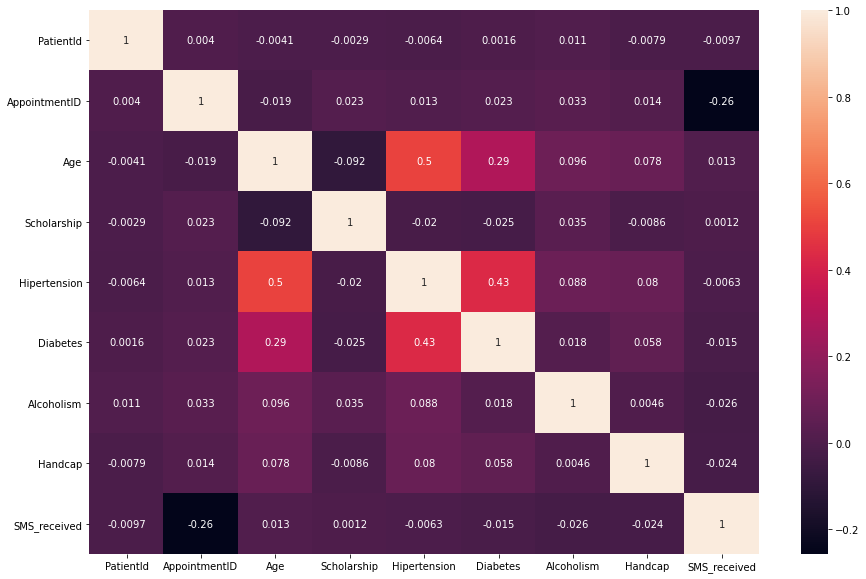

In [8]:
image, ax =plt.subplots(figsize =(15,10))
sns.heatmap(shows_df.corr(), ax=ax, annot = True)

The pervious heatmap shows a degree of corrolations between age and Hypertension, on the other hand less corrolations between age and diabetes. 
However, it shows a corrolation between the Hypertension and Diabetes!

#### 2- Validation 
##### 2.1 Missing Values

In [9]:
## checking missing values
shows_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**No missing data**

##### 2.2 Duplication values

In [10]:
shows_df.duplicated().sum()

0

In [11]:
# any duplication in unique field appointmentID 
sum(shows_df.AppointmentID.duplicated())

0

**No Duplications in the AppointmentID**

In [12]:
# check PatientId duplication
sum(shows_df.PatientId.duplicated())

48228

In [13]:
shows_df.PatientId.value_counts().head(5)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
7.579746e+13    62
Name: PatientId, dtype: int64

Looks like patients booked more than an appointment and as we see the highest number of booked appointments by top 5 patients. So we can't use this field as primary key!


##### 2.3 Incorrect Data

In [14]:
# Check values in the columns if it zero or negative or empaty space 
shows_df[shows_df.AppointmentID <0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

**AppointmentID** will be used as primary Key in the data analysis

In [15]:
shows_df[shows_df.PatientId <0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [16]:
shows_df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [17]:
shows_df['ScheduledDay'].unique()

<DatetimeArray>
['2016-04-29 18:38:08+00:00', '2016-04-29 16:08:27+00:00',
 '2016-04-29 16:19:04+00:00', '2016-04-29 17:29:31+00:00',
 '2016-04-29 16:07:23+00:00', '2016-04-27 08:36:51+00:00',
 '2016-04-27 15:05:12+00:00', '2016-04-27 15:39:58+00:00',
 '2016-04-29 08:02:16+00:00', '2016-04-27 12:48:25+00:00',
 ...
 '2016-06-07 07:45:16+00:00', '2016-06-07 07:38:34+00:00',
 '2016-04-27 15:15:06+00:00', '2016-05-03 07:51:47+00:00',
 '2016-05-03 08:23:40+00:00', '2016-05-03 09:15:35+00:00',
 '2016-05-03 07:27:33+00:00', '2016-04-27 16:03:52+00:00',
 '2016-04-27 15:09:23+00:00', '2016-04-27 13:30:56+00:00']
Length: 103549, dtype: datetime64[ns, UTC]

In [18]:
shows_df['AppointmentDay'].unique()

<DatetimeArray>
['2016-04-29 00:00:00+00:00', '2016-05-03 00:00:00+00:00',
 '2016-05-10 00:00:00+00:00', '2016-05-17 00:00:00+00:00',
 '2016-05-24 00:00:00+00:00', '2016-05-31 00:00:00+00:00',
 '2016-05-02 00:00:00+00:00', '2016-05-30 00:00:00+00:00',
 '2016-05-16 00:00:00+00:00', '2016-05-04 00:00:00+00:00',
 '2016-05-19 00:00:00+00:00', '2016-05-12 00:00:00+00:00',
 '2016-05-06 00:00:00+00:00', '2016-05-20 00:00:00+00:00',
 '2016-05-05 00:00:00+00:00', '2016-05-13 00:00:00+00:00',
 '2016-05-09 00:00:00+00:00', '2016-05-25 00:00:00+00:00',
 '2016-05-11 00:00:00+00:00', '2016-05-18 00:00:00+00:00',
 '2016-05-14 00:00:00+00:00', '2016-06-02 00:00:00+00:00',
 '2016-06-03 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
 '2016-06-07 00:00:00+00:00', '2016-06-01 00:00:00+00:00',
 '2016-06-08 00:00:00+00:00']
Length: 27, dtype: datetime64[ns, UTC]

As it shows that the **AppointmentDay** time all set to be Zeros so it will not be included in the analysis. So we will use the ScheduledDay and AppointmentDay Dates to calculate the waiting duration

In [19]:
shows_df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Looking to the **Age** we see there is a value with negative number (-1), no clue why there is an age with negative value so this value will be excluded

In [20]:
shows_df[shows_df.Age <0]['Age']

99832   -1
Name: Age, dtype: int64

 Going deep into the data to understande value within to plan the Analysis

In [21]:
shows_df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [22]:
shows_df['Neighbourhood'].nunique()

81

In [23]:
shows_df['Scholarship'].unique()

array([0, 1])

In [24]:
shows_df['Hipertension'].unique()

array([1, 0])

In [25]:
shows_df['Diabetes'].unique()

array([0, 1])

In [26]:
shows_df['Alcoholism'].unique()

array([0, 1])

In [27]:
shows_df['Handcap'].unique()

array([0, 1, 2, 3, 4])

**Handcap** have 5 values, need to  know why?

In [28]:
shows_df['SMS_received'].unique()

array([0, 1])

In [29]:
shows_df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [118]:
shows_df['Day'].unique()

['Monday', 'Thursday', 'Friday', ' Wednesday', 'Saturday', 'Tuesday']
Categories (6, object): ['Monday', 'Thursday', 'Friday', ' Wednesday', 'Saturday', 'Tuesday']

**Summary** : form knowing the unique values and figure out the error we build an idea about what columns we will use and it what way, such as we will creat a new column for the waiting durations and the Age will be grouped by to find the variable between age sections and also we will consider the Neibourhood as who are close to the hospital will be more verified analysis as of their frequencies to go rather than the others who are far away from the hospital 

In [31]:
shows_df.shape

(110527, 14)


###  Cleaning Data

In [32]:
## Editing the columns name to matach:
shows_df.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
                    'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
                    'SMS_received', 'No_show']


In [33]:
shows_df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

In [34]:
## Convert PatientID type to be integer
shows_df['PatientID'] = (shows_df['PatientID']).astype('int64')

In [35]:
## Converting AppointmentDay and ScheduledDay to DateTime Format, we will not include the time as it been set to zeros 
#Appointment date:

In [36]:
shows_df.dtypes

PatientID                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No_show                        object
dtype: object

In [37]:
#shows_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates = ['ScheduledDay', 'AppointmentDay'])

In [38]:
shows_df.dtypes

PatientID                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No_show                        object
dtype: object

In [39]:
## Finding the waiting duration between the both columns:
#shows_df['WaitingTime']= shows_df.Appointment_date - shows_df.Booking_date
shows_df['WaitingTime']= (shows_df.AppointmentDay.dt.date - shows_df.ScheduledDay.dt.date)
shows_df['WaitingTime'] 


0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: WaitingTime, Length: 110527, dtype: timedelta64[ns]

In [40]:
## convert waiting time to be and integer:
shows_df['WaitingTime'] =(shows_df['WaitingTime'] / np.timedelta64(1, 'D')).astype(int)


In [41]:
shows_df['WaitingTime'].dtypes

dtype('int64')

In [42]:
# checking the dtype of all columns
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [43]:
#check the number of values in the dataframe 
(shows_df['WaitingTime'] > 0).count()

110527

In [44]:
# Finding if there negative value at the waiting time column 
shows_df[shows_df['WaitingTime'] < 0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingTime
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


From the concluded data we see that there are 5 patients who didn't show and also their booking date we been recorded aftert the actual appointment. So we will exclude those as there aren't explainations!

In [45]:
## Exclude nagative WaitingTime data:
shows_df = shows_df[shows_df['WaitingTime'] >= 0]

shows_df.shape


(110522, 15)

In [46]:
## Exclude the nefative Age Value:
shows_df = shows_df[shows_df.Age != -1]
shows_df.shape

(110521, 15)

In [47]:
shows_df['Day'] = pd.to_datetime(shows_df['AppointmentDay']).dt.day_name()

In [48]:
## Change data to categorial type in the dataset:
shows_df['No_show'] = shows_df.No_show.astype('category')
shows_df.No_show.cat.rename_categories(['Show', 'No Show'], inplace = True)

shows_df['SMS_received']= shows_df.SMS_received.astype('category')
shows_df.SMS_received.cat.rename_categories(['Yes', 'No'], inplace = True)

shows_df['Handicap']= shows_df.Handicap.astype('category')
shows_df.Handicap.cat.rename_categories(['No Hp', 'Hp 1', 'Hp 2', 'Hp 3', 'Hap 4'],
                                        inplace = True);

shows_df['Day'] = shows_df.Day.astype('category')
shows_df.Day.cat.rename_categories(['Monday', 'Friday', 'Tuesday', 'Saturday', 'Thursday', ' Wednesday'],
                                    inplace = True)


In [49]:
#checking the edited categories 
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110521 non-null  int64              
 1   AppointmentID   110521 non-null  int64              
 2   Gender          110521 non-null  object             
 3   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 5   Age             110521 non-null  int64              
 6   Neighbourhood   110521 non-null  object             
 7   Scholarship     110521 non-null  int64              
 8   Hypertension    110521 non-null  int64              
 9   Diabetes        110521 non-null  int64              
 10  Alcoholism      110521 non-null  int64              
 11  Handicap        110521 non-null  category           
 12  SMS_received    110521 non-null  category           
 13  No_show       

In [50]:
## convert waiting time to be and integer:
#shows_df['WaitingTime'] =(shows_df['WaitingTime'] / np.timedelta64(1, 'D')).astype(int)

In [51]:
#shows_df['WaitingTime'].dtypes

In [52]:
## Grouping out the Age for better analysis, making 6 Age groups with 20 year range

AgeLabel = ['0-19', '20-39', '40-59', '60-79', '80-99', '100+']
bins = [0, 20, 40, 60, 80, 100, 120]
shows_df['AgeRange']= pd.cut(shows_df.Age, bins, labels = AgeLabel, include_lowest = True)
shows_df['AgeRange'] = shows_df.AgeRange.astype('category')
shows_df.AgeRange.cat.categories

Index(['0-19', '20-39', '40-59', '60-79', '80-99', '100+'], dtype='object')

In [53]:
# Creating range group for waiting time between booked day and the actual appointment
shows_df['WaitingTime'].max()

179

In [54]:
# Adding new column as waiting durations range
DayLabel = ['0-29', '30-59', '60-89', '90-119', '120-149', '150 - 179']
bins = [0, 30, 60, 90, 120, 150, 180]
shows_df['WaitingTimeRange']= pd.cut(shows_df.WaitingTime, bins, labels = DayLabel, include_lowest = True)
shows_df['WaitingTimeRange'] = shows_df.WaitingTimeRange.astype('category')
shows_df.WaitingTimeRange.cat.categories

Index(['0-29', '30-59', '60-89', '90-119', '120-149', '150 - 179'], dtype='object')

In [55]:
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   PatientID         110521 non-null  int64              
 1   AppointmentID     110521 non-null  int64              
 2   Gender            110521 non-null  object             
 3   ScheduledDay      110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay    110521 non-null  datetime64[ns, UTC]
 5   Age               110521 non-null  int64              
 6   Neighbourhood     110521 non-null  object             
 7   Scholarship       110521 non-null  int64              
 8   Hypertension      110521 non-null  int64              
 9   Diabetes          110521 non-null  int64              
 10  Alcoholism        110521 non-null  int64              
 11  Handicap          110521 non-null  category           
 12  SMS_received      110521 non-null  category 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Observations:

<a id='Q1'></a>
### Q 1: What's the correlation between Show /No Show and other variable ? 

#### 1.1 Show vs No show appointment in Dataset:



In [56]:
no_show = shows_df["No_show"].value_counts()
print(no_show)

Show       88207
No Show    22314
Name: No_show, dtype: int64


<AxesSubplot:ylabel='show vs. no show'>

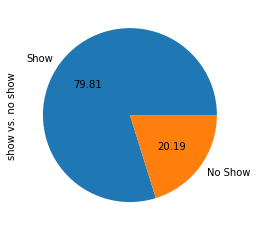

In [57]:
shows_df.groupby('No_show').size().plot(kind='pie', autopct='%.2f', ylabel = 'show vs. no show')

> As we see that the total number of Show appointment are **88207** vs **22314** which is about **79.81%** to **20.19%** of the total number of the appointemnt that been taken! 

> We conclued that it's a good persentage that about 80% of the patients show to their **appointments** more than the half!

<a id='Gender vs Show/No show'></a>
#### 1.2  Gender vs Show/No show:

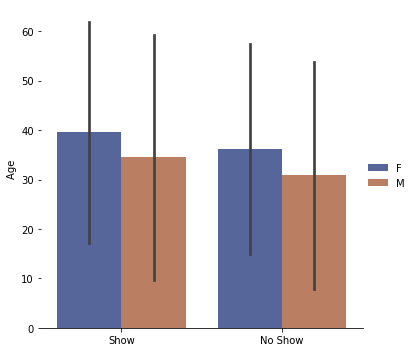

In [174]:
g = sns.catplot(
    data=shows_df, kind="bar",
    x="No_show", y="Age", hue="Gender",
    ci="sd", palette="dark", alpha=.7, height=5
)
g.despine(left=True)
g.set_axis_labels("", "Age ")
g.legend.set_title("")

In [62]:
groupedDf

No_show,Show,No Show
Gender,,
F,0.796885,0.203115
M,0.800362,0.199638


<AxesSubplot:ylabel='Gender'>

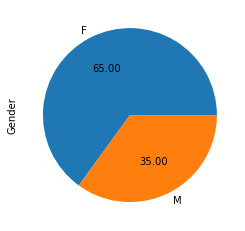

In [63]:
shows_df.groupby('Gender').size().plot(kind='pie', autopct='%.2f', ylabel = 'Gender')


> The data shows that **Male** gender show to their appointments almost more than the **Female** gender with a slid difference 0.01%. It indicate that Male gender cares more to show as the Female have a bit higher for no show!     


#### 1.3 Hypertension vs Show/No Show :

In [64]:
shows_df['Hypertension'].value_counts()

0    88720
1    21801
Name: Hypertension, dtype: int64

In [65]:
groupedDfhyp = pd.crosstab(shows_df['Hypertension'], shows_df['No_show'], normalize = 'index')
groupedDfhyp

No_show,Show,No Show
Hypertension,,
0,0.791005,0.208995
1,0.826980,0.173020


In [66]:
shows_df['Hypertension'].corr(shows_df['PatientID'])

-0.00643060581001632

> We see a negative  corrlation between Hypertension and Patient, as we see that about **79%** of the patients don't have Hypertension (0 = False and 1 = True)  and they still have the higher percantage of whom show to their aapointment. 
Only 3772 to 21801 patients didn't show to their appointment.  

#### 1.4 Waiting Time Range  vs Show/ No Show: 

In [67]:
groupedDfhyp = pd.crosstab(shows_df['WaitingTimeRange'], shows_df['No_show'], normalize = 'index')
groupedDfhyp

No_show,Show,No Show
WaitingTimeRange,,
0-29,0.811380,0.188620
30-59,0.658457,0.341543
60-89,0.712460,0.287540
90-119,0.795455,0.204545
120-149,0.620690,0.379310
150 - 179,0.678571,0.321429


In [68]:
shows_df['WaitingTimeRange'].value_counts()

0-29         100143
30-59          8283
60-89          1878
90-119          132
150 - 179        56
120-149          29
Name: WaitingTimeRange, dtype: int64

In [69]:
shows_df['WaitingTime'].mean()

10.184345056595578

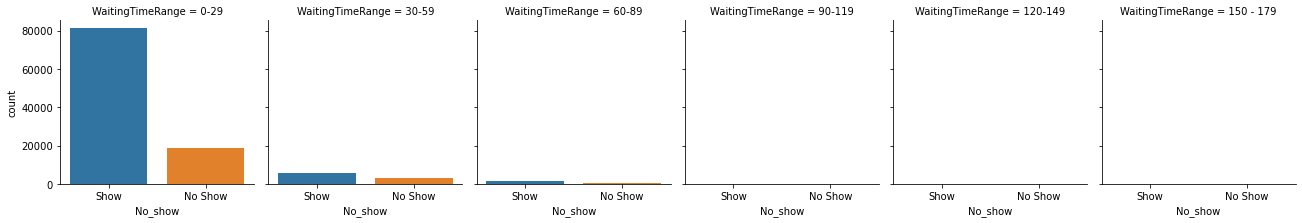

In [70]:
sns.catplot(x= 'No_show', col = 'WaitingTimeRange', data=shows_df[shows_df.AgeRange.notnull()],
                kind="count", height=3, aspect=1)

> Waiting Time Range shows us how the waiting period were mostly with in 29 days from the booking date. As we see that when the waiting date get longer the percentage of not showing get higher. However, we can see the most on No Show patient were in waiting time range from 0 to 29 as it is **18888** out of **100143** appointments no show in that range!!
> We see that the avarage waiting time is 10 days, which show how much this data more in one Range!



#### 1.5 Age Range vs Show/ No Show:

In [71]:
AgeR = shows_df["AgeRange"].value_counts()
print(AgeR)

0-19     31846
40-59    30081
20-39    28833
60-79    16910
80-99     2844
100+         7
Name: AgeRange, dtype: int64


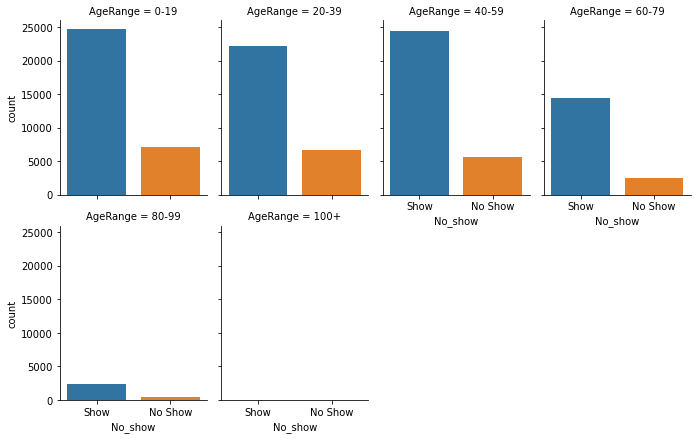

In [72]:
sns.catplot(x="No_show", col="AgeRange", col_wrap=4,
                data=shows_df[shows_df.AgeRange.notnull()],
                kind="count", height=3, aspect=0.8)

> We can see that Range from **0-19** years and **40-59** years are biggest scale of patients appointment. However, we see that the range **0-19** and **20-39** having more No Show for the appointments.  

#### 1.6 Receiving Reminder SMS vs Show/No show:

In [73]:
shows_df["SMS_received"].value_counts() 

Yes    75039
No     35482
Name: SMS_received, dtype: int64

<AxesSubplot:ylabel='SMS'>

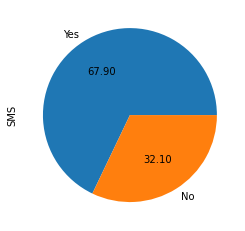

In [74]:
shows_df.groupby('SMS_received').size().plot(kind='pie', autopct='%.2f', ylabel = 'SMS')

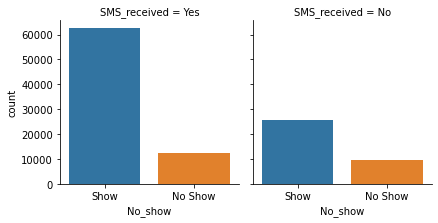

In [75]:
sns.catplot(x= 'No_show', col = 'SMS_received', data=shows_df[shows_df.SMS_received.notnull()],
                kind="count", height=3, aspect=1)

> As it shown that there is a negavtive correlation between the no sending SMS and show to the appointment, as we see in the chart and numbers that  **68% = 75K** of patients didn't receive the SMS, and show to their appointment more than the patients who did receive the SMS.

<a id='Q2'></a>
### Q 2:  Does one variable affect the other? 

In [76]:
def PercOfPatients(shows_df, variable):
    Patients_percentage = pd.pivot_table(shows_df, index=variable, values='PatientID',aggfunc = lambda x: len(x.unique()))
    return np.round(Patients_percentage/sum(Patients_percentage['PatientID'])*100,2)

In [77]:
dfnoshow = shows_df[shows_df['No_show'] == 'No Show']
dfnoshow.head(3)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingTime,Day,AgeRange,WaitingTimeRange
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,No Hp,Yes,No Show,2,Monday,20-39,0-29
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,No Hp,Yes,No Show,2,Monday,20-39,0-29
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,No Hp,No,No Show,3,Monday,20-39,0-29


In [78]:
def NoShowVars(df,var1, var2):
    corr2vars = pd.crosstab(dfnoshow[var1], columns = dfnoshow[var2], normalize = 'index')
    corr2vars = np.round(corr2vars * 100,2)
    return corr2vars

#### 2.1 Does which day a week has effect on No show regards their Ages:

In [79]:
NoShowVars(dfnoshow,'AgeRange','Day')

Day,Monday,Friday,Tuesday,Saturday,Thursday,Wednesday
AgeRange,,,,,,
0-19,18.64,20.26,0.01,14.91,22.17,24.01
20-39,18.37,21.17,0.03,14.46,23.34,22.63
40-59,17.28,22.00,0.04,15.42,23.43,21.84
60-79,17.66,21.44,0.12,15.45,23.73,21.60
80-99,18.06,16.13,0.22,13.98,25.59,26.02
100+,0.00,33.33,0.00,66.67,0.00,0.00


In [80]:
PercOfPatients(shows_df, 'Day')

,PatientID
Day,
Monday,17.28
Friday,20.52
Tuesday,0.04
Saturday,16.29
Thursday,22.99
Wednesday,22.88


> When we look here we find that most of the missed appointments were in the Thursday and Wednesday. The rage 80-99 years who missed the most, may there are other facter to them even transportations or helper aren't avaliable. While patients show less No-Show on Monday and Saturday. Seems that Satuday is the day that most of patient go to their appointment as it's a weekend.   



In [81]:
PercOfPatients(shows_df, 'AgeRange')

,PatientID
AgeRange,
0-19,30.17
20-39,25.24
40-59,26.38
60-79,15.50
80-99,2.70
100+,0.01


array([<AxesSubplot:ylabel='PatientID'>], dtype=object)

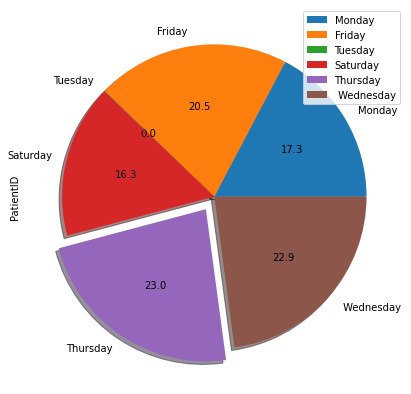

In [82]:
explode = (0, 0, 0, 0,0.1,0)
PercOfPatients(shows_df, 'Day').plot(kind = 'pie', subplots = True, autopct='%.1f', 
                                         figsize = (7,7), explode = explode, shadow=True)

> However here we see that most of the appointments had been taken were in the Wednesday and Thursday by mostly the age catergories (0-19, 20-39, 40-59), Is the possiblity that the middle age range are in work during the week and that's the reason for missing the middle week appointments!! 

>Tuesday is consider the day that almost No Show and number of appointments is almost 0.04%, it would be the hostpital day off or even the hospital staff on that day don't register the information!! 


#### 2.2 Do Handicap contidtion affect No Show:

In [83]:
NoShowVars(dfnoshow,'Gender','Handicap')

Handicap,No Hp,Hp 1,Hp 2,Hp 3,Hap 4
Gender,,,,,
F,98.34,1.48,0.17,0.00,0.01
M,97.89,1.92,0.16,0.04,0.00


In [84]:
PercOfPatients(shows_df, 'Handicap')

,PatientID
Handicap,
No Hp,98.18
Hp 1,1.65
Hp 2,0.16
Hp 3,0.01
Hap 4,0.00


> From calculate Hanicap categories, we find out most of patients aren't Handicapped. Only less than 2% who are hanicapped, and even the percentage of missing the appointments aren't Handicap patients !! 

#### 2.3 Do Hyperthension and Diabites affect No Show :

In [85]:
NoShowVars(dfnoshow,'Hypertension','Diabetes')

Diabetes,0,1
Hypertension,,
0,98.44,1.56
1,69.75,30.25


In [86]:
PercOfPatients(shows_df, 'Hypertension')

,PatientID
Hypertension,
0,80.35
1,19.65


In [87]:
PercOfPatients(shows_df, 'Diabetes')

,PatientID
Diabetes,
0,92.91
1,7.09


> As it showing that not a high percentage of patients do suffer Hypertension nor Diabetes, so we can't relate them with No Show. On other hand we see that about **30%**  of who missed the appointments where patiendts who suffer from Diabetes and Hypertension. Which let us ask does these diseases prevent them from showing up?!


#### 2.4  Do SMS Reminder and Age affect No show   :

In [88]:
NoShowVars(dfnoshow,'AgeRange' ,'SMS_received')

SMS_received,Yes,No
AgeRange,,
0-19,58.25,41.75
20-39,51.66,48.34
40-59,56.34,43.66
60-79,59.44,40.56
80-99,67.74,32.26
100+,100.00,0.00


> Here we can see that even the hospital sent a SMS reminder to the patiend eventho they didn't show up. The highest in between is patients in group age **20-39** years old. 

#### 2.4 Describition 

array([<AxesSubplot:ylabel='PatientID'>], dtype=object)

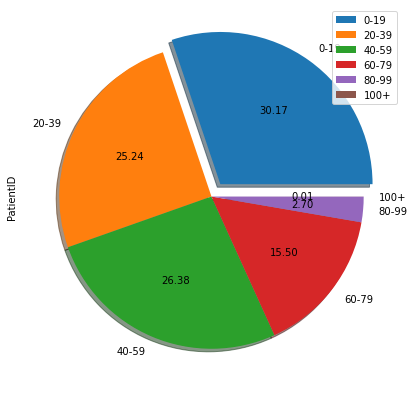

In [89]:
explode = (0.1, 0, 0, 0,0,0)
PercOfPatients(shows_df, 'AgeRange').plot(kind = 'pie', subplots = True, autopct='%.2f', 
                                         figsize = (7,7), explode = explode, shadow=True)

> This pie chart show that number of appointment takin by patients between 0-19 years old are the highest between the patient

In [90]:
shows_df['No_show'].describe()

count     110521
unique         2
top         Show
freq       88207
Name: No_show, dtype: object

In [91]:
shows_df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,WaitingTime
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,15.255153
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [92]:
Describe_No = shows_df[shows_df['No_show'] == 'No Show'].describe()
Describe_No


,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,WaitingTime
count,2.231400e+04,2.231400e+04,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000,22314.000000
mean,1.467385e+14,5.652252e+06,34.317872,0.115533,0.169042,0.064085,0.030340,15.835484
std,2.549489e+14,7.430333e+04,21.965009,0.319671,0.374797,0.244910,0.171524,16.605600
min,5.628261e+06,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176779e+12,5.614180e+06,16.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,3.157963e+13,5.657910e+06,33.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,9.454290e+13,5.703176e+06,51.000000,0.000000,0.000000,0.000000,0.000000,23.000000
max,9.996585e+14,5.789986e+06,115.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [93]:
Describe_Show = shows_df[shows_df['No_show'] == 'Show'].describe()
Describe_Show

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,WaitingTime
count,8.820700e+04,8.820700e+04,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,1.476809e+14,5.681135e+06,37.790504,0.093904,0.204394,0.073838,0.030417,8.754759
std,2.563739e+14,6.931193e+04,23.338645,0.291697,0.403261,0.261508,0.171733,14.550450
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.168386e+12,5.646218e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.176138e+13,5.685683e+06,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,9.433684e+13,5.731078e+06,56.000000,0.000000,0.000000,0.000000,0.000000,12.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [94]:
Decribtive_df= shows_df.drop(['PatientID','AppointmentID', 'Age'], axis=1)

In [95]:
Decribtive_df.groupby(by=['No_show','AgeRange']).describe()

Scholarship                                               \
                       count      mean       std  min  25%  50%  75%  max   
No_show AgeRange                                                            
Show    0-19         24752.0  0.108274  0.310733  0.0  0.0  0.0  0.0  1.0   
        20-39        22209.0  0.140529  0.347542  0.0  0.0  0.0  0.0  1.0   
        40-59        24490.0  0.082809  0.275599  0.0  0.0  0.0  0.0  1.0   
        60-79        14373.0  0.031030  0.173406  0.0  0.0  0.0  0.0  1.0   
        80-99         2379.0  0.003363  0.057904  0.0  0.0  0.0  0.0  1.0   
        100+             4.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
No Show 0-19          7094.0  0.123908  0.329499  0.0  0.0  0.0  0.0  1.0   
        20-39         6624.0  0.157156  0.363975  0.0  0.0  0.0  0.0  1.0   
        40-59         5591.0  0.102665  0.303548  0.0  0.0  0.0  0.0  1.0   
        60-79         2537.0  0.033110  0.178959  0.0  0.0  0.0  0.0  1.0   
        80-99          465.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
        100+             3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

                 Hypertension            ... Alcoholism      WaitingTime  \
                        count      mean  ...        75%  max       count   
No_show AgeRange                         ...                               
Show    0-19          24752.0  0.001333  ...        0.0  1.0     24752.0   
        20-39         22209.0  0.063038  ...        0.0  1.0     22209.0   
        40-59         24490.0  0.300327  ...        0.0  1.0     24490.0   
        60-79         14373.0  0.539692  ...        0.0  1.0     14373.0   
        80-99          2379.0  0.623371  ...        0.0  1.0      2379.0   
        100+              4.0  0.250000  ...        0.0  0.0         4.0   
No Show 0-19           7094.0  0.002255  ...        0.0  1.0      7094.0   
        20-39          6624.0  0.052083  ...        0.0  1.0      6624.0   
        40-59          5591.0  0.295117  ...        0.0  1.0      5591.0   
        60-79          2537.0  0.569570  ...        0.0  1.0      2537.0   
        80-99           465.0  0.679570  ...        0.0  1.0       465.0   
        100+              3.0  0.000000  ...        0.0  0.0         3.0   

                                                                      
                       mean        std  min  25%   50%    75%    max  
No_show AgeRange                                                      
Show    0-19       7.840053  12.540144  0.0  0.0   1.0  12.00  125.0  
        20-39      8.173668  13.073706  0.0  0.0   2.0  12.00  176.0  
        40-59      9.211556  15.092524  0.0  0.0   3.0  13.00  179.0  
        60-79     10.102066  17.299375  0.0  0.0   3.0  13.00  179.0  
        80-99     10.861707  20.882843  0.0  0.0   2.0  13.00  176.0  
        100+       4.250000   7.228416  0.0  0.0   1.0   5.25   15.0  
No Show 0-19      15.625317  15.193874  0.0  4.0  12.0  24.00  146.0  
        20-39     15.997434  15.268501  0.0  5.0  12.0  23.00  179.0  
        40-59     15.586836  16.840935  0.0  4.0   9.0  23.00  176.0  
        60-79     16.136382  20.984680  0.0  3.0   7.0  21.00  179.0  
        80-99     18.090323  23.891827  0.0  3.0   9.0  24.00  176.0  
        100+      14.666667  20.207259  3.0  3.0   3.0  20.50   38.0  

[12 rows x 40 columns]

>We notice that the average age of patients is 37 year old, where we can find that the higher percentage of No Show when the waiting time average is 15 days or more, when it's less than 8 days waiting increase the possibility of Show the patients to the appointments. 


#### 2.5 Does Neighbourhood associated number of appointments 
Figure out the most area that using the hospital


In [96]:
PercOfPatients(shows_df, 'Neighbourhood').idxmax(axis =0)

PatientID    JARDIM CAMBURI
dtype: object

Reducing the number of neighbourhood from 81 to the top 10 

In [97]:
Highest_Neighbourhood = PercOfPatients(shows_df, 'Neighbourhood').nlargest(10, 'PatientID')
Highest_Neighbourhood

,PatientID
Neighbourhood,
JARDIM CAMBURI,6.73
MARIA ORTIZ,5.35
JARDIM DA PENHA,3.86
RESISTÊNCIA,3.81
ITARARÉ,3.43
CENTRO,3.00
TABUAZEIRO,2.98
SANTA MARTHA,2.80
SANTO ANTÔNIO,2.66


array([<AxesSubplot:ylabel='PatientID'>], dtype=object)

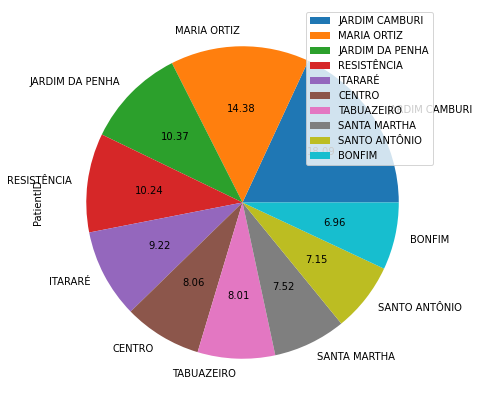

In [98]:
Highest_Neighbourhood.plot(kind = 'pie', subplots = True, autopct='%.2f', 
                                         figsize = (7,20))

In [99]:
Hood = list(shows_df['Neighbourhood'].value_counts().nlargest(10).index)
Hood_df = shows_df[shows_df['Neighbourhood'].isin (Hood)]
Hood_noshow = Hood_df[Hood_df['No_show']=='No Show']


In [100]:
Hood_show_groupped = Hood_df.groupby(by='Neighbourhood').No_show.value_counts().sort_index()
Hood_show_groupped.sum()

40565

In [101]:
Hood_show_groupped = Hood_df.groupby(by='Neighbourhood').No_show.value_counts().sort_index()
Hood_show_groupped

Neighbourhood      No_show
BONFIM             Show       2223
                   No Show     550
CENTRO             Show       2631
                   No Show     703
ITARARÉ            Show       2591
                   No Show     923
JARDIM CAMBURI     Show       6252
                   No Show    1465
JARDIM DA PENHA    Show       3246
                   No Show     631
JESUS DE NAZARETH  Show       2157
                   No Show     696
MARIA ORTIZ        Show       4586
                   No Show    1219
RESISTÊNCIA        Show       3525
                   No Show     905
SANTA MARTHA       Show       2635
                   No Show     496
TABUAZEIRO         Show       2559
                   No Show     572
Name: No_show, dtype: int64

In [102]:
Hood_noshow_groupped = Hood_noshow.groupby(by='Neighbourhood').No_show.value_counts().sort_index()
Hood_noshow_groupped

Neighbourhood      No_show
BONFIM             No Show     550
CENTRO             No Show     703
ITARARÉ            No Show     923
JARDIM CAMBURI     No Show    1465
JARDIM DA PENHA    No Show     631
JESUS DE NAZARETH  No Show     696
MARIA ORTIZ        No Show    1219
RESISTÊNCIA        No Show     905
SANTA MARTHA       No Show     496
TABUAZEIRO         No Show     572
Name: No_show, dtype: int64

In [103]:
NoShowVars(Hood_show,'AgeRange','Gender')

NameError: name 'Hood_show' is not defined

> As it show, **JARDIM CAMBURI** area consider the top where the patients are from,with **7 %** out of all. Then **Maria Ortiz** by **5.35%**. Also showing that most of the No Show appointment been for Female espcialy for the Female who are between 20-39 years old!!

>Number of appointment been taken by the 10 highest Neighbourhood were almost the third of total appointments. A close look we see that about **20%** of the patients from **JARDIM CAMBURI area** didn't show up to their appointment even they are consider the highest number in all areas.   

<a id='Q3'></a>
### Q3 : Who didn't show the most, new patients or the regular patients:

In [104]:
new_patients = round(((dfnoshow['PatientID'].nunique()/dfnoshow['AppointmentID'].nunique()) * 100),2)
new_patients


79.15

In [105]:
Reg_patients = round((100-new_patients), 2)
Reg_patients

20.85

> From total number of No Show appointments, we see that New patients are the most to miss the appointments with 79.15% to 20.85% to the Regular patients who usually go to this hospital! That would lead to a question: Why would new patients did show to their appointments? would the reason be the distance of the Neighbourhood or is there other reason like waiting duration?


<a id='conclusions'></a>
## Conclusions

> **`Limitations`**: 
- 1- Appointments number were the main key to do all the calculations and wasn't done by the number of patients
- 2- The dataset size was 110527; however we have to exclude 6 entres as the obtian negative values. As 5 of them the appointment day were before the booking day, and another 1 row obtain an Age with a negative value. So the analysis been done with a new size 110521.
- 3- We have to exclude the time frame from the data as the values where 00:00:00+00:00 in the Appointment Day column.
- 4- The analysis only shows value distributions, and the causations cannot be drawn.
- 5- Most of the columns are categorical data, and it can't show a strong correlation and why we only where able to use the categorical visualization and other statistical tests. 

> **`Investigation Question`**: 
- Q 1: What's the correlation between Show /No Show and other variable ?
- Q 2:  Do one variable affect the other? 
- Q3 : Who didn't show the most, new patients or the regular patients?

> **`Output`**:
- The overall show rate to No show  is **79.81%** to **20.19%**
- From the above observation, we'd say that Gender, Age, Neighbourhood and Hypertension are the top characters that might help to predict if the patient will Show/NoShow.
- New patients are the highest percantage to not show for the appoitments for **79.15%** new patients to **20.85%** regular patients.
- Reminder SMS do not affect if the patient will Show or No Show to their appoitment, which is might there are other factor. 
- Female patients are more than the Male patients by **64.28%** vs **35.72%**
- Only **1.65%** of the hospital patients are Handicapped, which show that Handicap is not the reason for the patients to miss their appointments and **98.34%** don't suffer from handicap situation. 
- Highest waiting duration is fall in the range of **0-29** days with average waiting **10 days** from the scheduled day to the appointment day 
- Only **7%** of hospital patients have Diabetes and **19%** have Hypertenstion. 
- Number of appointment been taken by the 10 highest Neighbourhood were almost the third of total appointments.
- There are 81 different Neighbourhood. **JARDIM CAMBURI** and **Maria Ortiz** have the hightest appointments number by about **12.5%** of the total numbers.  
- Wednesday and Thursday is consider the highest amount of appointment by **45.87%** of the total number of appointments. While we see there almost no appointments on Tuesday.
- There were about **30%** of the patients who didn't show up were having Hypertension and Diabetes. 



